In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

[0. 0.]
rewards


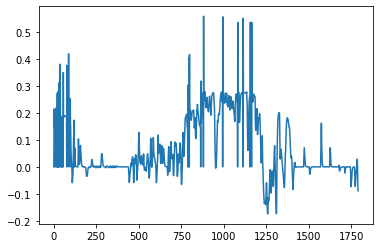

compass


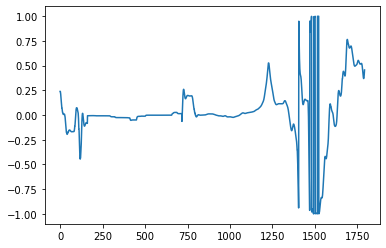

dirt


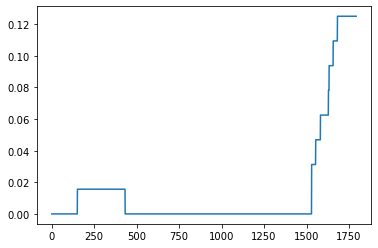

forward


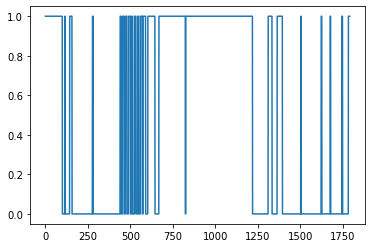

left


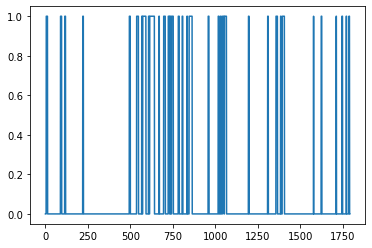

back


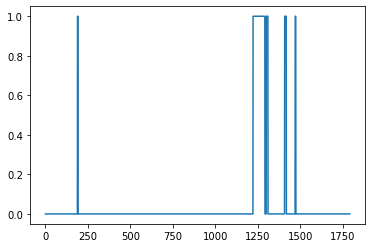

right


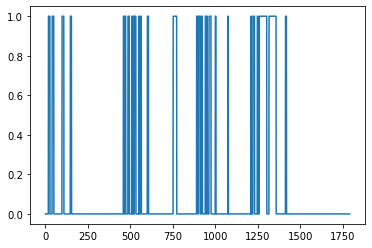

jump


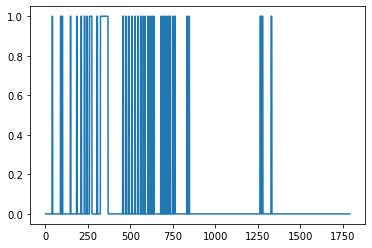

sneak


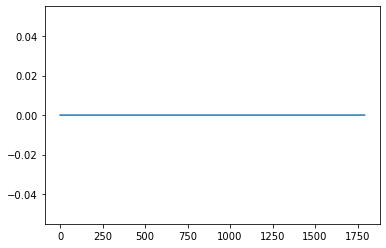

sprint


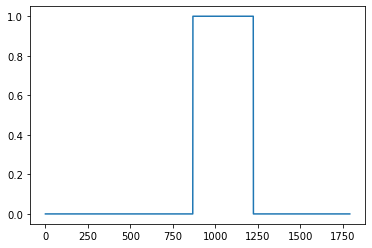

attack


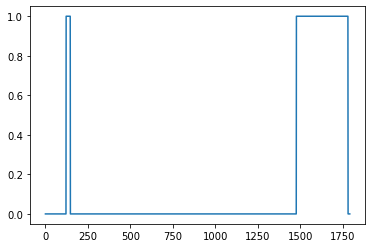

camera


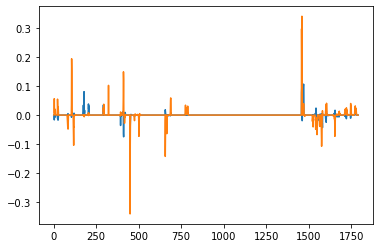

place


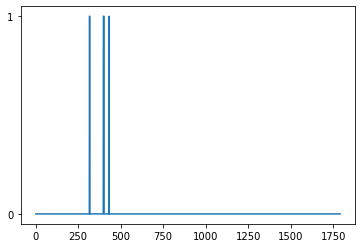

['none' 'none' 'none' ... 'none' 'none' 'none']


In [201]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
file = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\NDTRAIN.npy", allow_pickle=True)[1][:]

print(file[-2][0])
labels = ["rewards", "compass", "dirt", "forward", "left", "back", "right", "jump", "sneak", "sprint", "attack", "camera", "place"]
#compass angle
file[1] = file[1]/180
#rewards without the last frame
file[0] = file[0][:-1]
#camera action
file[-2] = file[-2]/180
#dirt in inventory
file[2] = file[2]/64
#placing objects
for each in range(len(file[-1])):
    checking = file[-1][each]
    if checking == "none":
        file[-1][each] = 0
    else:
        file[-1][each] = 1
        
for i in range(len(file)):
    print(labels[i])
    plt.plot(file[i])
    plt.show()
    
print(place)

In [202]:
camera_x = []
camera_y = []

for j in range(len(file[-2])):
    camera_x.append(file[-2][j][0])
    camera_y.append(file[-2][j][1])
place = file[-1]
file = file[:-2]
file.append(np.array(camera_x))
file.append(np.array(camera_y))
file.append(place)
print(np.array(file).shape)

#file = file.remove(-2)
#print(file)
#print(camera_y)

(14,)


In [139]:
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import pandas as pd

[0.0, 0.06309222, 0.21552046, 0.14301698, 0.16081223, 0.15942454, 0.1521209, 0.13016649, 0.116869986, 0.10946987, 0.23948741000000004, 0.23948741000000004, 0.22862864000000008, 0.21347522000000005]
[0.19469190000000003, 0.17336559999999995, 0.15075087999999998, 0.12807608000000006, 0.10661530400000001, 0.08685755999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, -0.0]
[-0.0016666624, -0.016666668, -0.0, -0.0, -0.0, -0.0, -0.00583334, -0.006666671, 0.0, 0.0016666836, 0.004999966, 0.05666665, 0.0083334185, 0.00583335]
[0.007500034, 0.004999966, 0.019999992, 0.01750005, '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


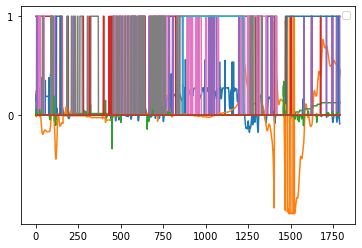

In [212]:
#print(file)
processed_file = []
one_list = []

for g in range(14):
    for i in range(10):
        arr = file[g][i]
        one_list.append(arr)

        if len(one_list) == 14:
            processed_file.append(one_list)
            one_list=[]
            print(processed_file[-1])
X_data = processed_file[:3][:3]
Y_data = processed_file[:3][3:]

for each in np.array(file):
    plt.plot(each)
plt.legend()
plt.show()


In [213]:
lin_reg = LinearRegression()
lin_reg.fit([np.array(X_data)], [np.array(Y_data)])

LinearRegression()

In [216]:
test_x = processed_file[9][:3]
test_y = processed_file[9][3:]
print("Predictions: ", lin_reg.predict(np.array([test_x])))
print("Labels: ", test_y)

Predictions:  [[0.14301698 0.16081223 0.15942454 0.1521209  0.13016649 0.11686999
  0.10946987 0.23948741 0.23948741 0.22862864 0.21347523]]
Labels:  [0.01750005, '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
